Based on https://bambinos.github.io/bambi/main/notebooks/t-test.html

# Comparison of two means (T-test)

In [1]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

az.style.use("arviz-darkgrid")
np.random.seed(1234)

# Generate data

In [2]:
a = np.random.normal(6, 2.5, 160)
b = np.random.normal(8, 2, 120)
df = pd.DataFrame({"Group": ["a"] * 160 + ["b"] * 120, "Val": np.hstack([a, b])})

df.head()

,Group,Val
0,a,7.178588
1,a,3.022561
2,a,9.581767
3,a,5.218370
4,a,4.198528


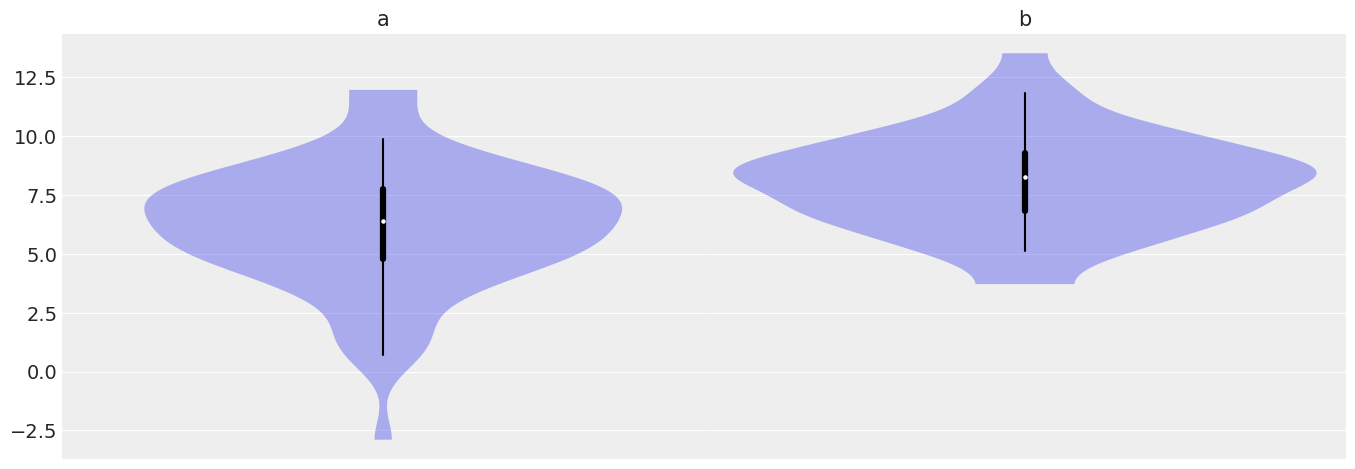

In [3]:
az.plot_violin({"a": a, "b": b});

# Model 1

In [4]:
model_1 = bmb.Model("Val ~ Group", df)
results_1 = model_1.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, Group, Val_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [5]:
model_1

Formula: Val ~ Group
Family name: Gaussian
Link: identity
Observations: 280
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 6.9762, sigma: 8.1247)
    Group ~ Normal(mu: 0.0, sigma: 12.4107)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.4567)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

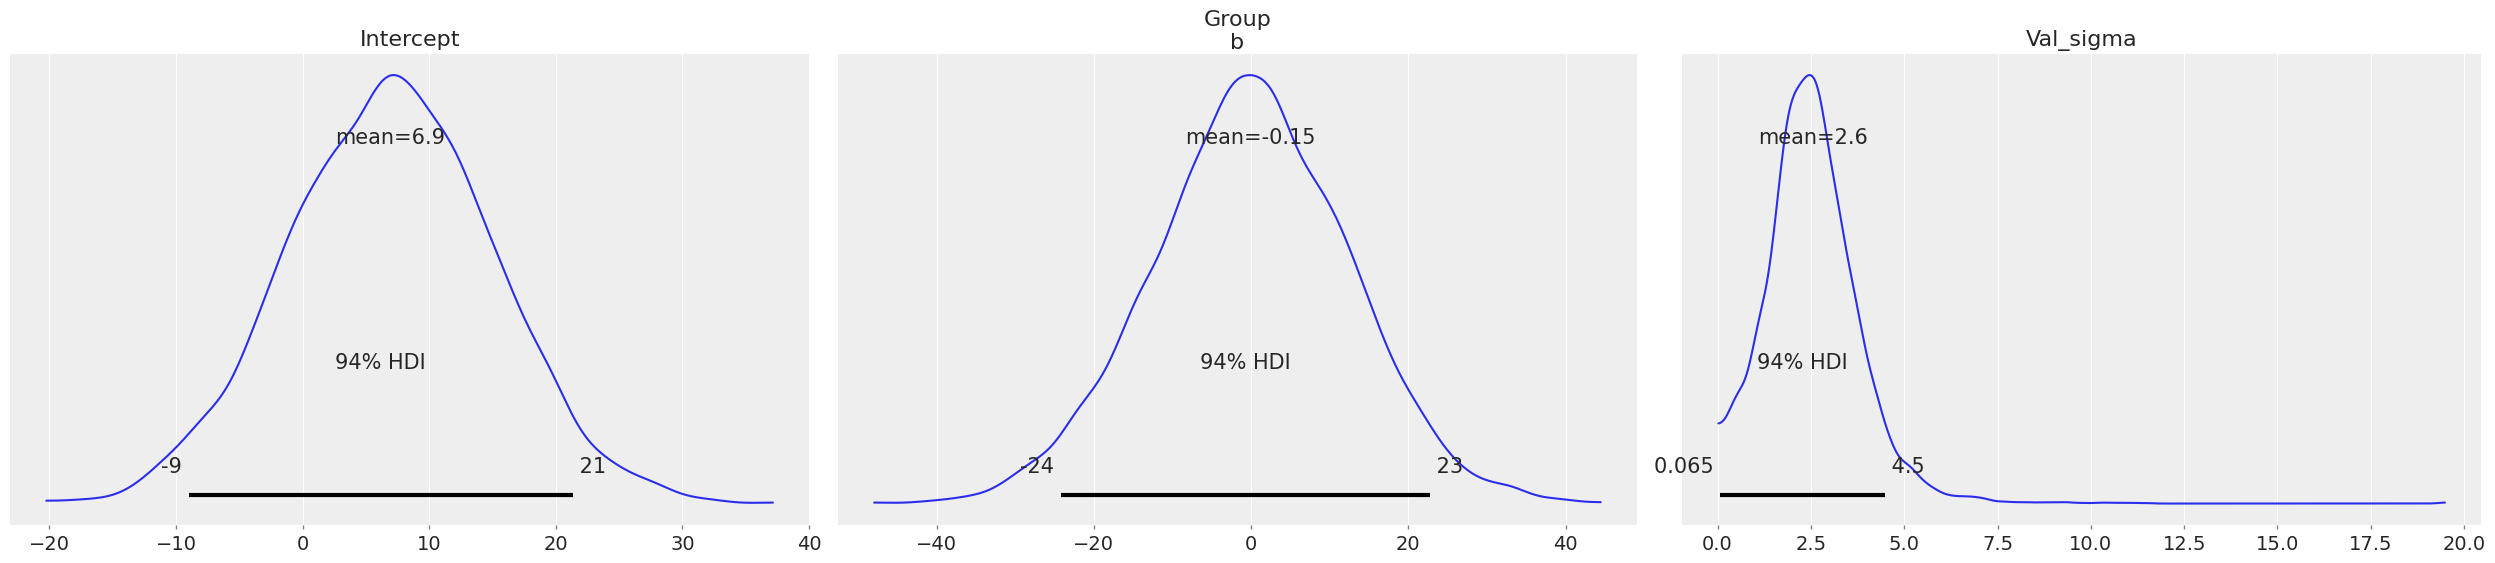

In [6]:
model_1.plot_priors();

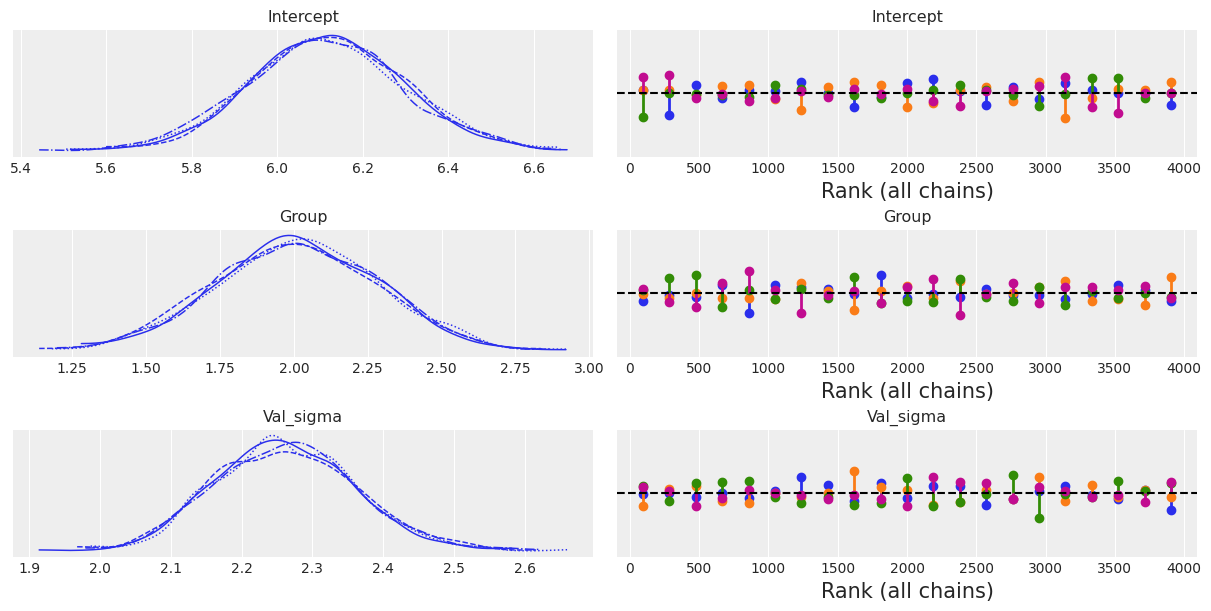

In [7]:
az.plot_trace(results_1, kind="rank_vlines");

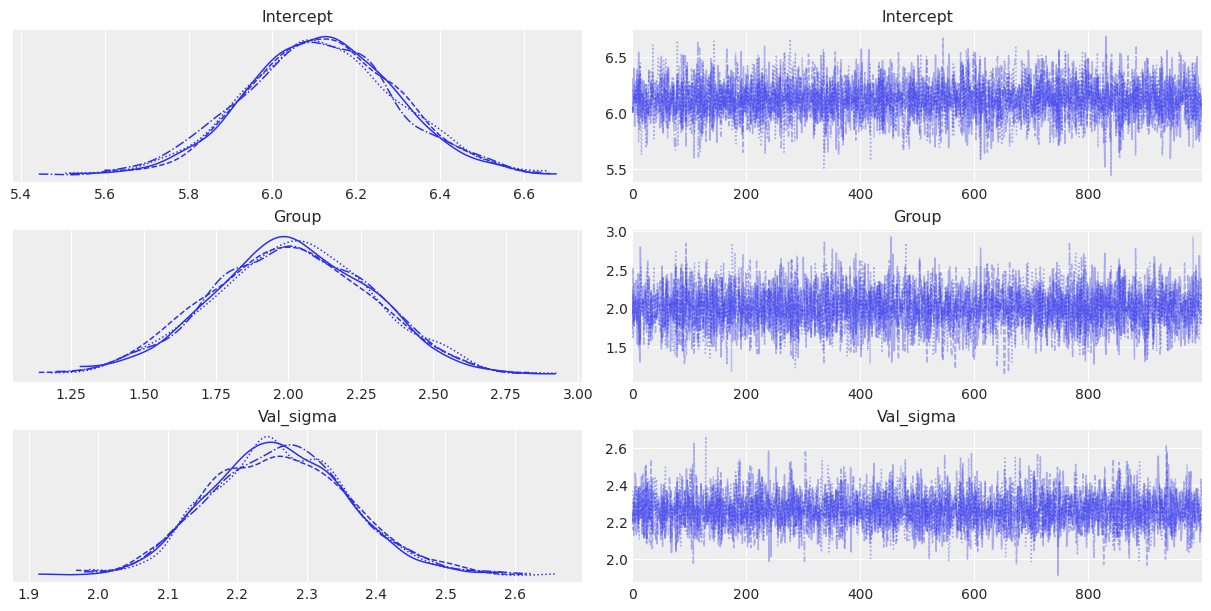

In [8]:
az.plot_trace(results_1);

In [9]:
az.summary(results_1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,6.115,0.178,5.788,6.460,0.003,0.002,4689.0,2752.0,1.0
Group[b],2.010,0.274,1.518,2.547,0.004,0.003,5235.0,2874.0,1.0
Val_sigma,2.262,0.098,2.088,2.450,0.001,0.001,5173.0,2892.0,1.0


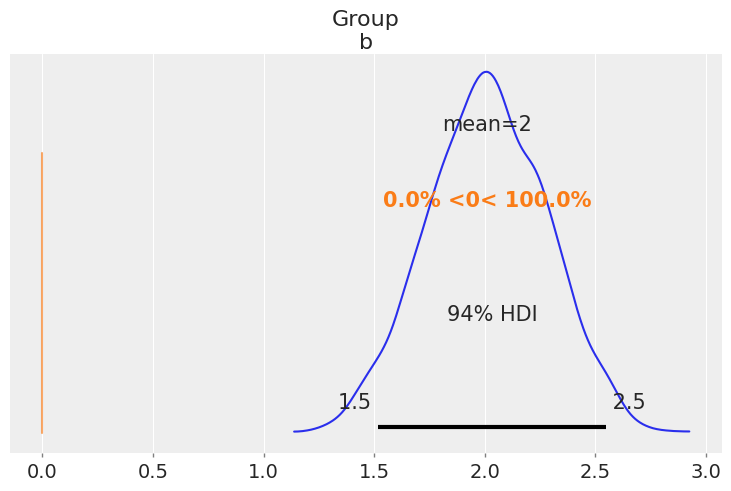

In [10]:
az.plot_posterior(results_1, var_names="Group", ref_val=0);

In [11]:
# Probabiliy that posterior is > 0
(results_1.posterior["Group"] > 0).mean().item()

1.0

# Model 2

In [12]:
model_2 = bmb.Model("Val ~ 0 + Group", df)
results_2 = model_2.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Group, Val_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [13]:
model_2

Formula: Val ~ 0 + Group
Family name: Gaussian
Link: identity
Observations: 280
Priors:
  Common-level effects
    Group ~ Normal(mu: [0. 0.], sigma: [12.4107 12.4107])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.4567)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

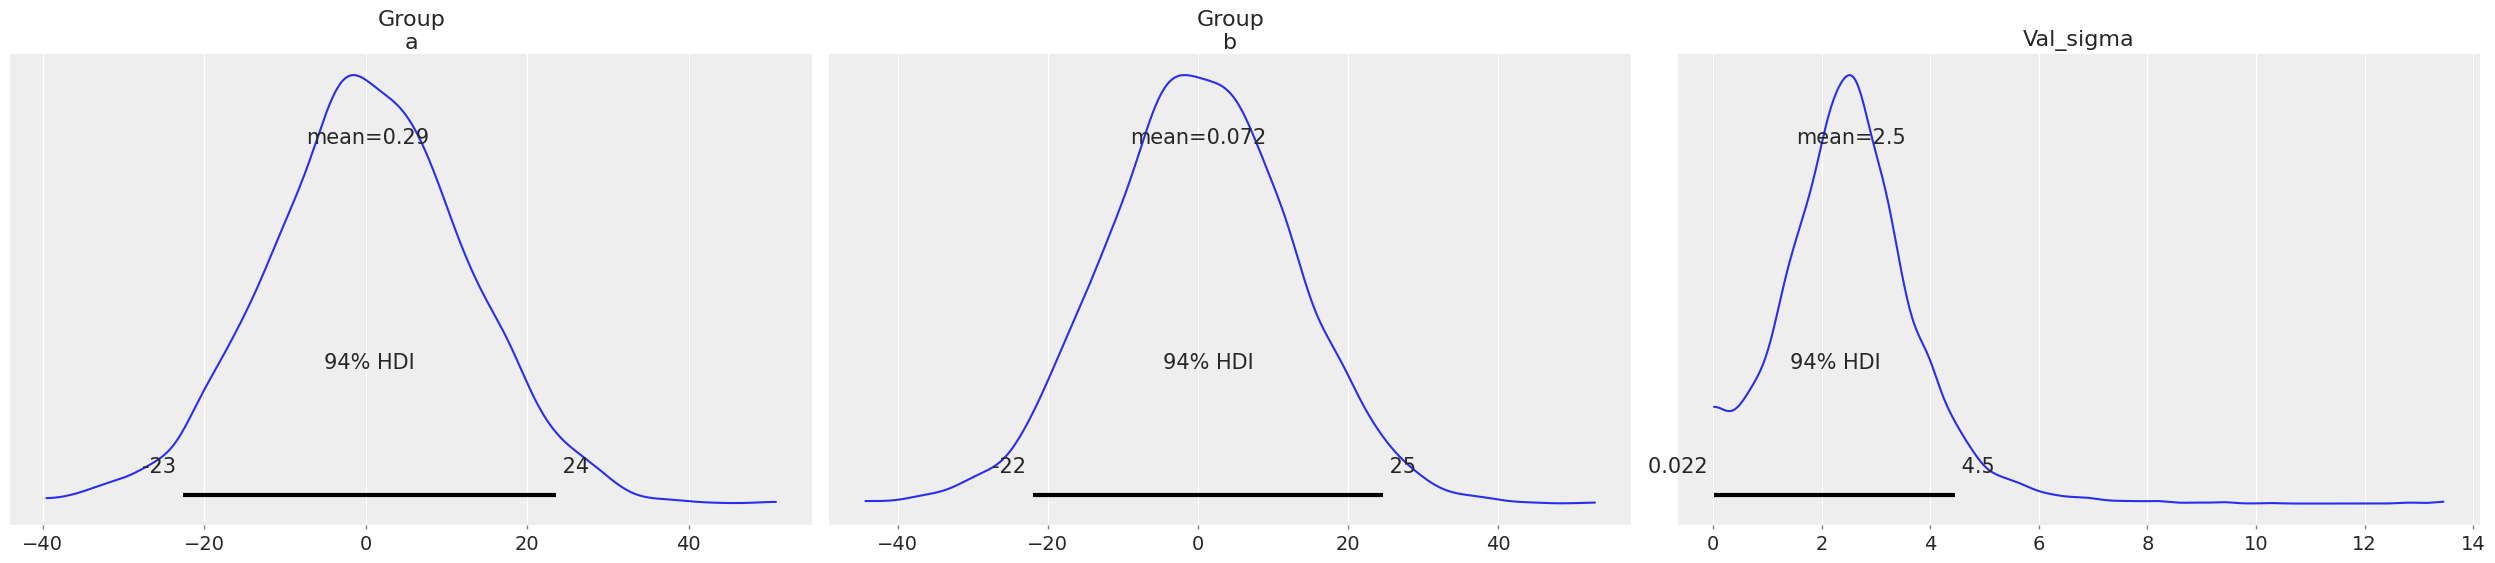

In [14]:
model_2.plot_priors();

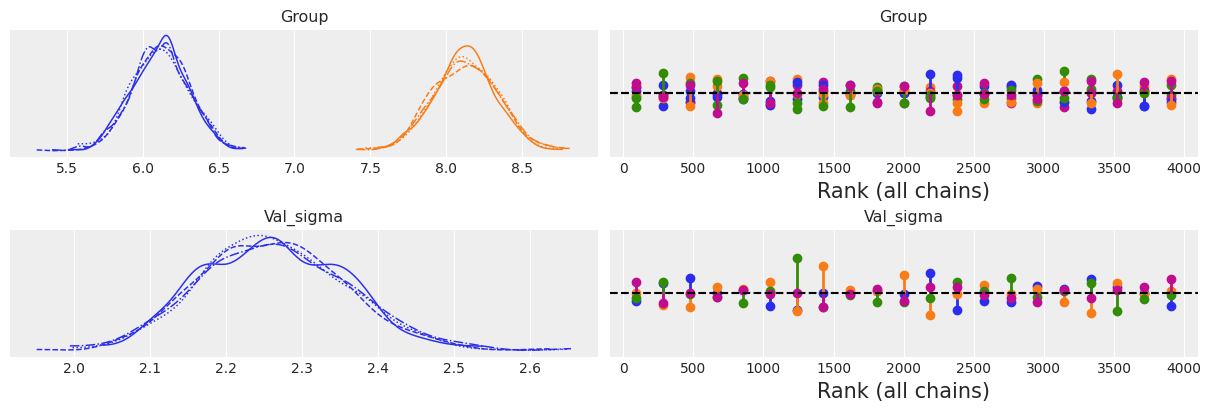

In [15]:
az.plot_trace(results_2, kind="rank_vlines");

In [16]:
az.summary(results_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Group[a],6.116,0.185,5.779,6.470,0.002,0.002,5669.0,3009.0,1.0
Group[b],8.126,0.208,7.739,8.504,0.003,0.002,5725.0,2785.0,1.0
Val_sigma,2.264,0.096,2.083,2.436,0.001,0.001,5670.0,3113.0,1.0


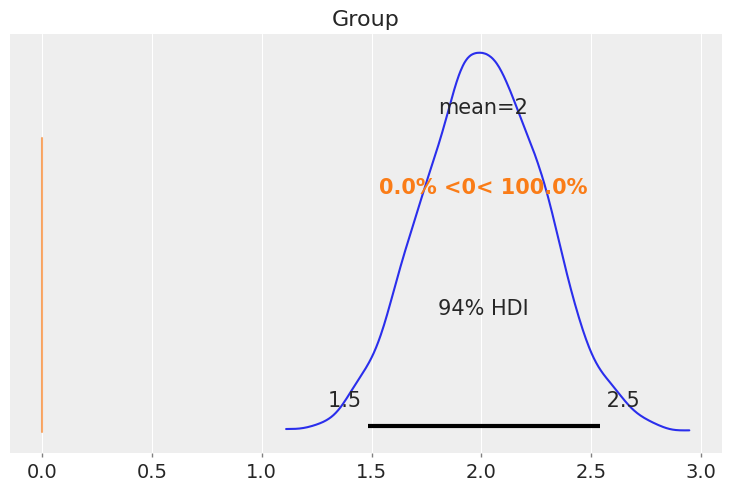

In [17]:
post_group = results_2.posterior["Group"]
diff = post_group.sel(Group_dim="b") - post_group.sel(Group_dim="a")
az.plot_posterior(diff, ref_val=0);

In [18]:
# Probabiliy that posterior is > 0
(post_group > 0).mean().item()

1.0

In [19]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Fri Aug 19 2022

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.4.0

pandas    : 1.4.3
arviz     : 0.12.1
numpy     : 1.21.6
bambi     : 0.9.0
matplotlib: 3.5.3

Watermark: 2.3.1

